### Plot PDF of the TBs for all GMI channels, Fig. 7 and Fig. A2 of the manuscript

In [26]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import scipy 
plt.rcParams.update({'font.size': 20})


cols = ["#999999", "#E69F00", "#56B4E9", "#009E73",
        "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
with open("../WorkArea/GMI/results/hist_gmi_jan.pickle", "rb") as f:
    hist_gmi = pickle.load(f)
    hist_gmi1 = pickle.load(f)
    hist_gmi2 = pickle.load(f)
    hist_gmi3 = pickle.load(f)
    bins      = pickle.load(f)
    f.close()

In [28]:
with open("../WorkArea/GMI/results//hist_lpa_jan.pickle" , "rb") as f:
    hist_lpa = pickle.load(f)
    hist_lpa1 = pickle.load(f)
    hist_lpa2 = pickle.load(f)
    hist_lpa3 = pickle.load(f)
    bins      = pickle.load(f)
    f.close()

In [29]:
with open("../WorkArea/GMI/results//hist_lpa_pr1_jan.pickle" , "rb") as f:
    hist_lpa_pr1 = pickle.load(f)
    hist_lpa1_pr1 = pickle.load(f)
    hist_lpa2_pr1 = pickle.load(f)
    hist_lpa3_pr1 = pickle.load(f)
    bins          = pickle.load(f)
    f.close()

In [30]:
with open("../WorkArea/GMI/results//hist_esa_jan.pickle" , "rb") as f:
    hist_esa  = pickle.load(f)
    hist_esa1 = pickle.load(f)
    hist_esa2 = pickle.load(f)
    hist_esa3 = pickle.load(f)
    bins      = pickle.load(f)
    f.close()

In [31]:
with open("../WorkArea/GMI/results//hist_esa_pr1_jan.pickle" , "rb") as f:
    hist_esa_pr1  = pickle.load(f)
    hist_esa1_pr1 = pickle.load(f)
    hist_esa2_pr1 = pickle.load(f)
    hist_esa3_pr1 = pickle.load(f)
    bins          = pickle.load(f)
    f.close()

In [32]:
bin_center = (bins[1:] + bins[:-1])*0.5

In [33]:
def plot_pdfs(hist_gmi, hist_lpa, hist_lpa_pr1, hist_esa, hist_esa_pr1, bin_center, filename = "PDF_TB_jan.pdf" ):
    fig, ax = plt.subplots(2,2, figsize = [16, 16])
    ax = ax.ravel()
    titles = ["166V GHz", "166H GHz", r"183.31$\pm$3 GHz", r"183.31$\pm$7 GHz"]
    for i in range(4):
        ax[i].plot(bin_center, hist_gmi[:, i], '-k', label = "GMI", linewidth = 2.5)
        ax[i].plot(bin_center, hist_lpa[:, i], '-',c = "tab:blue",  label = "LPA-aARO", linewidth = 2.5)
        ax[i].plot(bin_center, hist_lpa_pr1[:, i], '-', c = "tab:red", label = "LPA-TRO", linewidth = 2.5)
        #ax[i].plot(bin_center, hist_esa[:, i],c = cols[1], label = "ESA-ARO", linewidth = 2.5)
        #ax[i].plot(bin_center, hist_esa_pr1[:, i] , c = cols[3], label = "ESA-TRO", linewidth = 2.5)
        ax[i].set_yscale("log")

        ax[0].legend()
        ax[i].set_title(titles[i])
        ax[i].set_ylim([1e-7, 1e-1])
        ax[i].grid('on', alpha = 0.2)

    ax[2].set_xlabel("TB [K]")
    ax[2].set_ylabel(r"PDF [#K$^{-1}$] ")   
    ax[3].set_xlabel("TB [K]")
    ax[0].set_ylabel(r"PDF [#K$^{-1}$] ")  
    
    ax[0].text(95, 1.2e-1, "a)") 
    ax[1].text(95, 1.2e-1, "b)") 
    ax[2].text(95, 1.2e-1, "c)") 
    ax[3].text(95, 1.2e-1, "d)") 
    
    fig.savefig(filename, bbox_inches = "tight")

In [34]:
def mean_TB(hist, bin_center):
    atb = np.zeros([4])
    for i in range(4):
        atb[i] = np.sum(bin_center[:69] * hist[:69, i] * 2)/np.sum(hist[:69, i] * 2)
    return atb

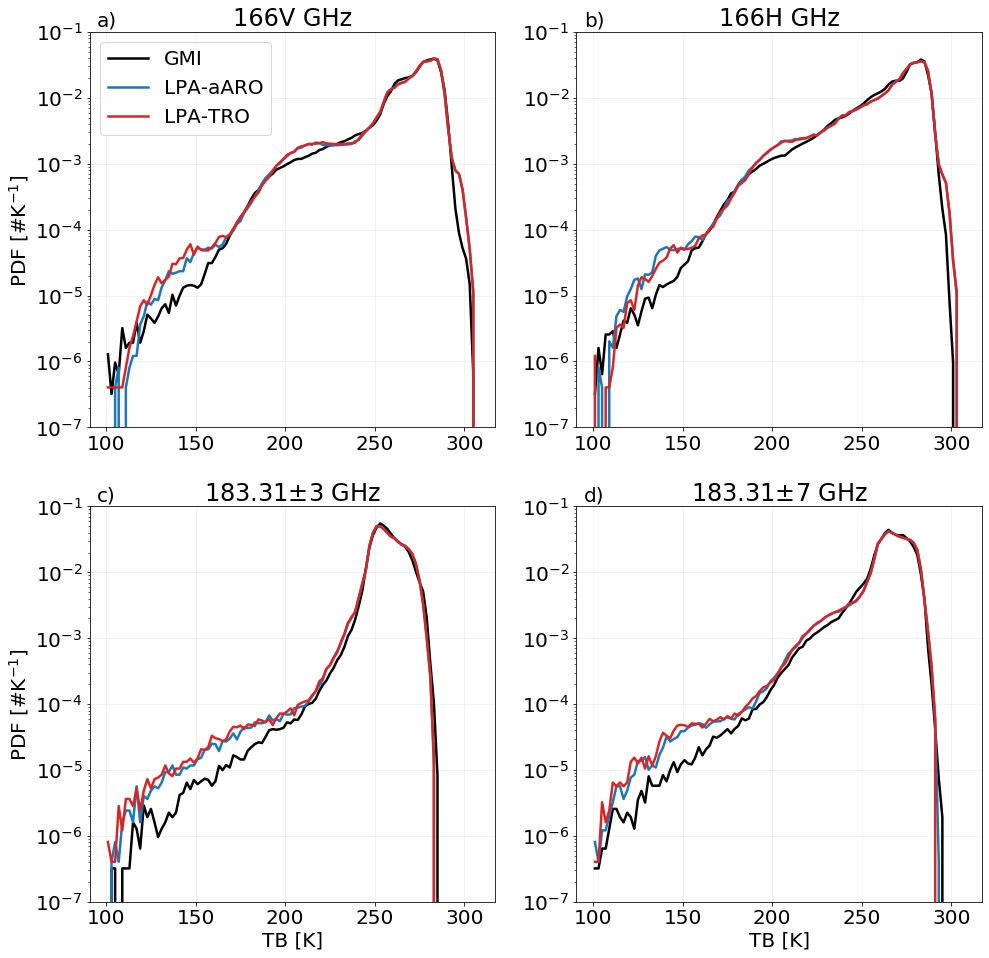

In [35]:
plot_pdfs(hist_gmi, hist_lpa, hist_lpa_pr1, hist_esa, hist_esa_pr1, bin_center, filename = "PDF_TB_jan.pdf" )

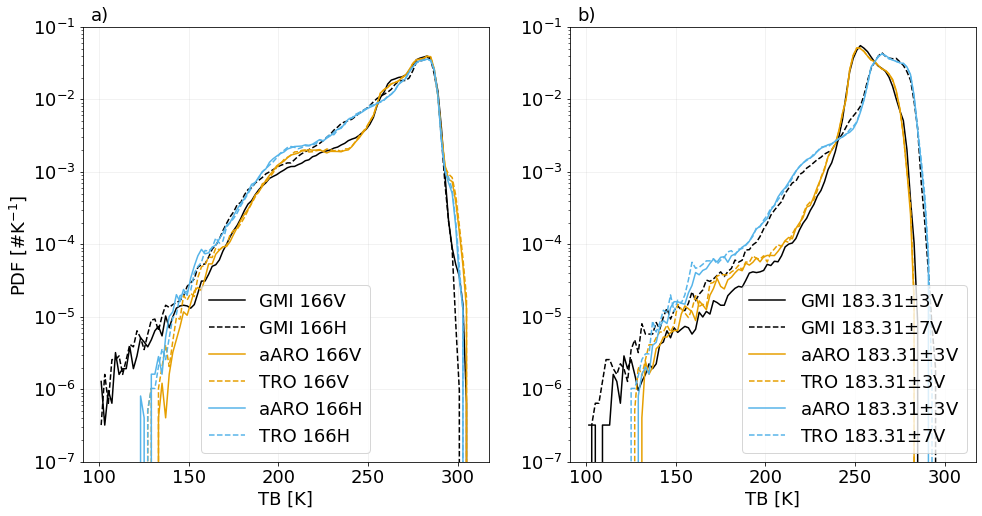

In [36]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(1,2, figsize = [16, 8])
ax = ax.ravel()
#titles = ["166V GHz", "166H GHz""]
ax[0].plot(bin_center, hist_gmi[:, 0], '-k', label = "GMI 166V")
ax[0].plot(bin_center, hist_gmi[:, 1], 'k--', label = "GMI 166H")

ax[0].plot(bin_center, hist_esa[:, 0], c = cols[1], label = "aARO 166V")
ax[0].plot(bin_center, hist_esa_pr1[:, 0], '--', c = cols[1], label = "TRO 166V")

ax[0].plot(bin_center, hist_esa[:, 1], c = cols[2], label = "aARO 166H")
ax[0].plot(bin_center, hist_esa_pr1[:, 1], '--', c = cols[2], label = "TRO 166H")

ax[1].plot(bin_center, hist_gmi[:, 2], '-k', label = r"GMI 183.31$\pm$3V")
ax[1].plot(bin_center, hist_gmi[:, 3], 'k--', label = r"GMI 183.31$\pm$7V")

ax[1].plot(bin_center, hist_esa[:, 2], c = cols[1], label = r"aARO 183.31$\pm$3V")
ax[1].plot(bin_center, hist_esa_pr1[:, 2], '--', c = cols[1], label = r"TRO 183.31$\pm$3V")

ax[1].plot(bin_center, hist_esa[:, 3], c = cols[2], label = r"aARO 183.31$\pm$3V")
ax[1].plot(bin_center, hist_esa_pr1[:, 3], '--', c = cols[2], label = r"TRO 183.31$\pm$7V")


#ax.plot(bin_center, hist_esa[:, i], '--', label = "ESA-ARO")
#ax.plot(bin_center, hist_esa_pr1[:, i], '-.' ,label = "ESA-TRO")
for i in range(2):
    ax[i].set_yscale("log")

    ax[i].legend()
    #ax.set_title(titles[i])
    ax[i].grid('on', alpha = 0.2)
    ax[i].grid('on', alpha = 0.2)
    ax[i].set_ylim([1e-7, 1e-1])
    ax[i].set_xlabel("TB [K]")
    ax[0].set_ylabel(r"PDF [#K$^{-1}$] ")   
    ax[i].set_xlabel("TB [K]")
    #ax[i].set_ylabel(r"PDF [#K$^{-1}$] ")   
    
ax[0].text(95, 1.2e-1, "a)") 
ax[1].text(95, 1.2e-1, "b)") 
fig.savefig("TB_esa.pdf", bbox_inches = "tight")

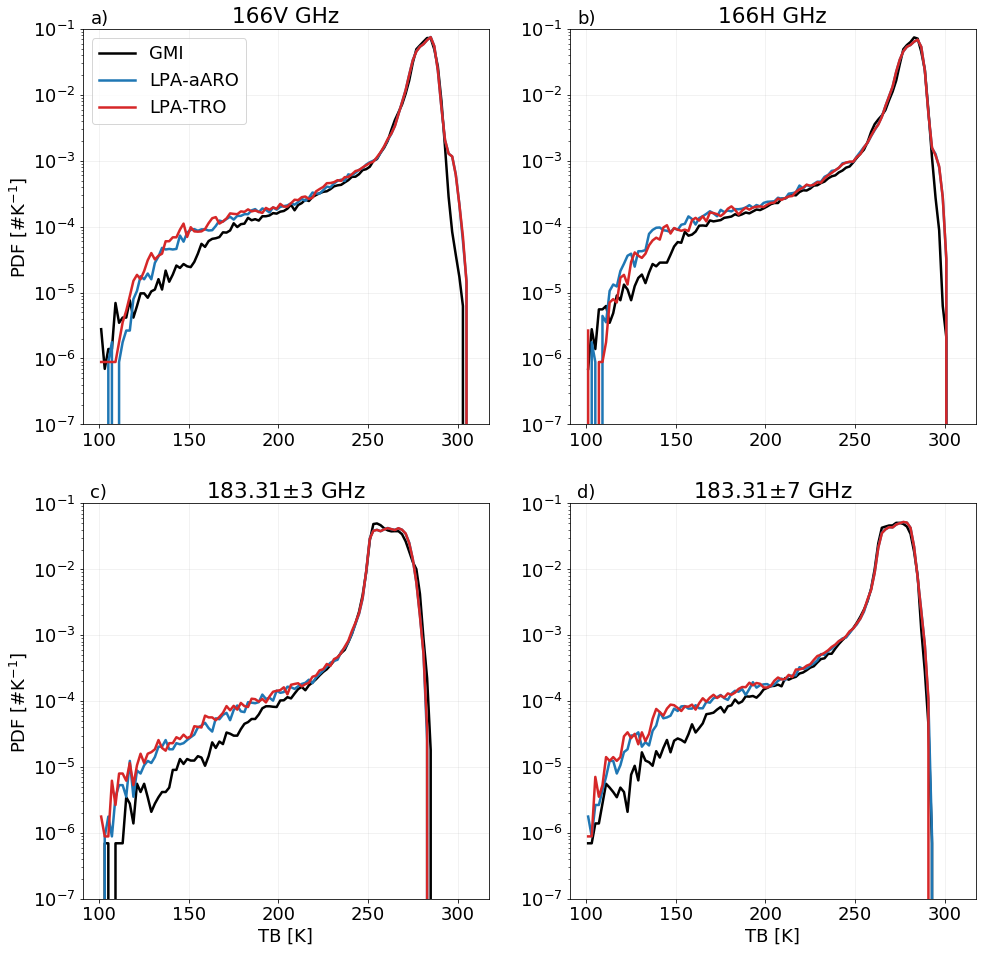

In [37]:
plot_pdfs(hist_gmi1, hist_lpa1, hist_lpa1_pr1, hist_esa1, hist_esa1_pr1, bin_center, filename = "PDF_TB_jan_tropics.pdf" )

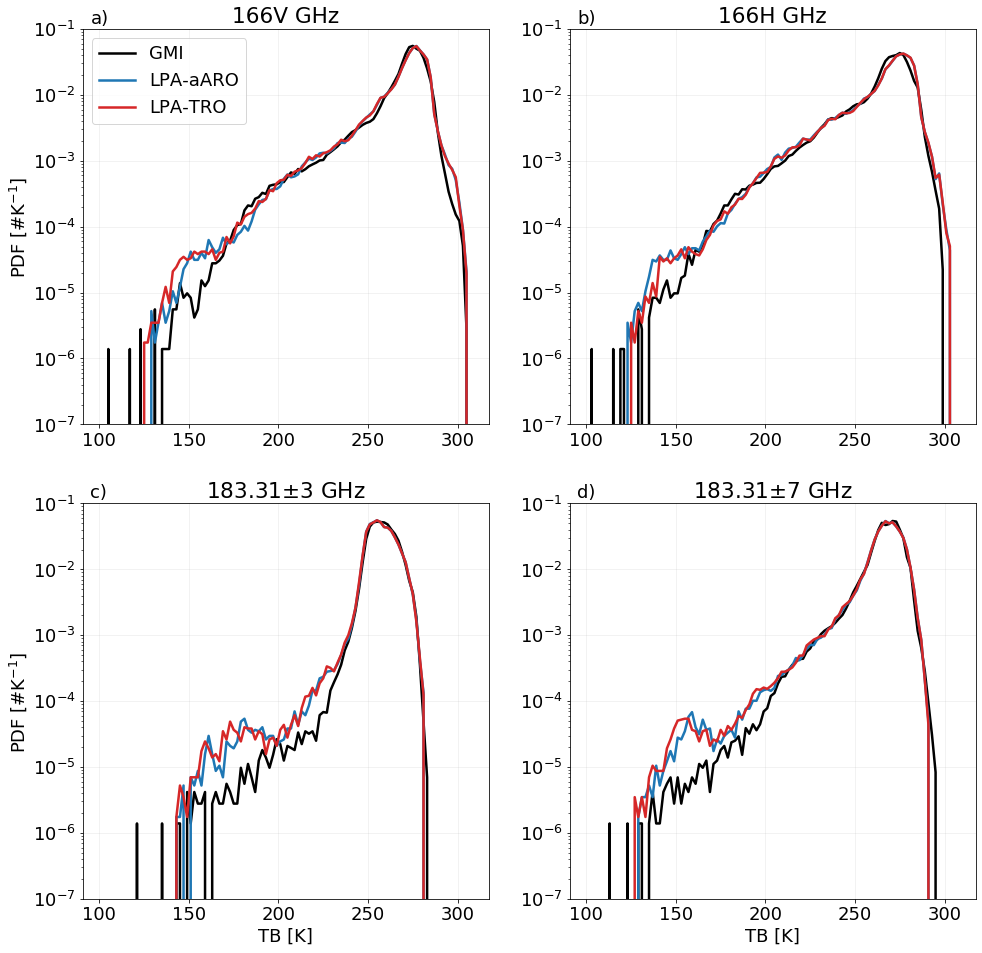

In [38]:
plot_pdfs(hist_gmi2, hist_lpa2, hist_lpa2_pr1, hist_esa2, hist_esa2_pr1, bin_center, filename = "PDF_TB_jan_mlat.pdf" )

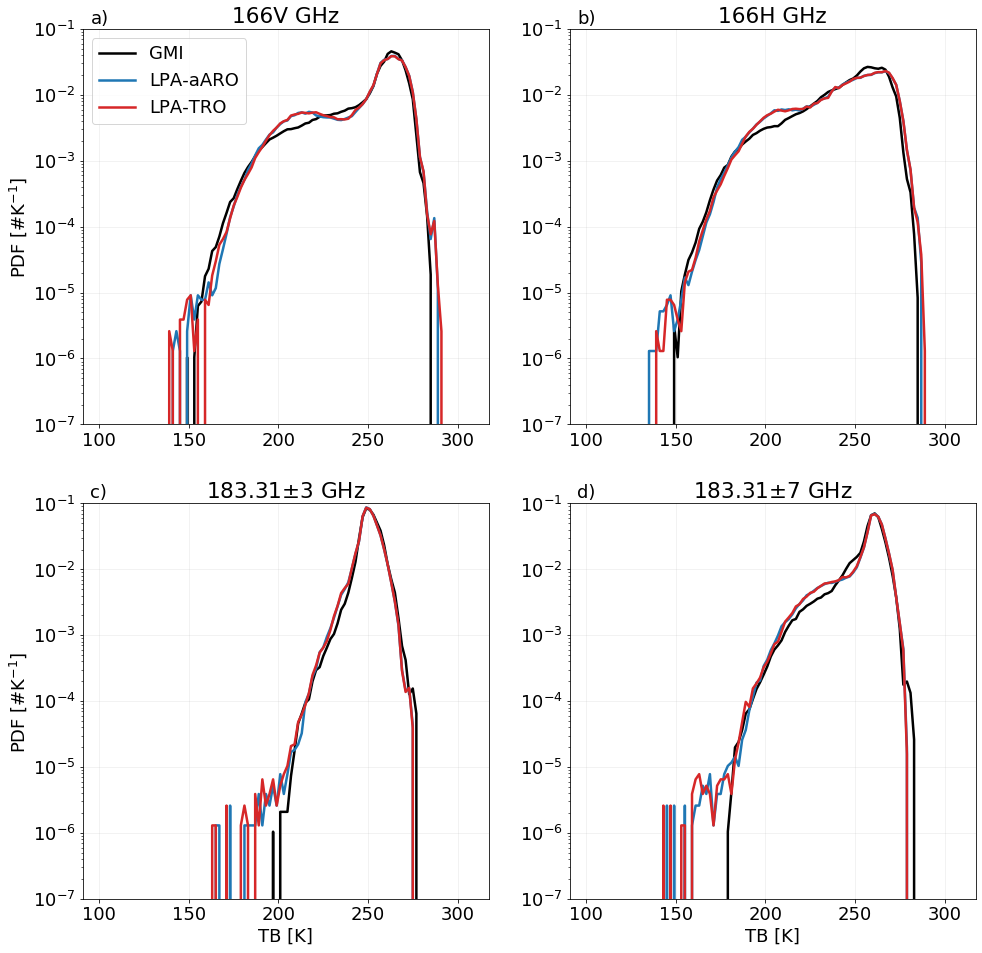

In [39]:
plot_pdfs(hist_gmi3, hist_lpa3, hist_lpa3_pr1, hist_esa3, hist_esa3_pr1, bin_center, filename = "PDF_TB_jan_hlat.pdf" )

In [40]:
with open("../WorkArea/GMI/results/hist_gmi_jun.pickle", "rb") as f:
    hist_gmi = pickle.load(f)
    bins     = pickle.load(f)
    f.close()

In [16]:
with open("../WorkArea/GMI/results/hist_lpa_jun.pickle" , "rb") as f:
    hist_lpa = pickle.load(f)
    bins     = pickle.load(f)
    f.close()

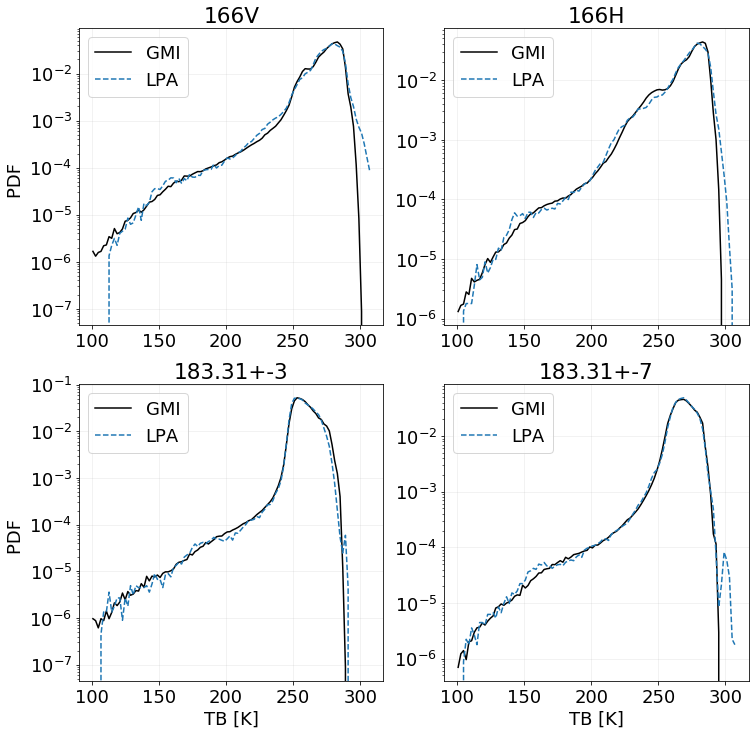

In [17]:
fig, ax = plt.subplots(2,2, figsize = [12, 12])
ax = ax.ravel()
titles = ["166V", "166H", "183.31+-3", "183.31+-7"]
for i in range(4):
    ax[i].plot(bin_center, hist_gmi[:, i], '-k', label = "GMI")
    ax[i].plot(bin_center, hist_lpa[:, i], '--', label = "LPA")
#    ax[i].plot(bin_center, hist_lpa_pr1[:, i], '--', label = "LPA_pr1")
#    ax[i].plot(bin_center, hist_esa[:, i], '--', label = "ESA")
#    ax[i].plot(bin_center, hist_esa_pr1[:, i], '-.' ,label = "ESA_pr1")
    ax[i].set_yscale("log")

    ax[i].legend()
    ax[i].set_title(titles[i])
    ax[i].grid('on', alpha = 0.2)
    
ax[2].set_xlabel("TB [K]")
ax[2].set_ylabel("PDF ")   
ax[3].set_xlabel("TB [K]")
ax[0].set_ylabel("PDF ")   
fig.savefig("PDF_TB_jun.pdf", bbox_inches = "tight")

In [18]:
with open("../WorkArea/GMI/PD_lpa.pickle", "rb") as f:
    hist_gmi = pickle.load(f)
    hist_lpa = pickle.load(f)
    bins     = pickle.load(f)
    f.close()

In [19]:
with open("../WorkArea/GMI/PD_lpa_pr1.pickle", "rb") as f:
    hist_gmi = pickle.load(f)
    hist_lpa_pr1 = pickle.load(f)
    bins     = pickle.load(f)
    f.close()

In [20]:
with open("../WorkArea/GMI/PD_esa.pickle", "rb") as f:
    hist_gmi = pickle.load(f)
    hist_esa = pickle.load(f)
    bins     = pickle.load(f)
    f.close()

In [21]:
with open("../WorkArea/GMI/PD_esa_pr1.pickle", "rb") as f:
    hist_gmi = pickle.load(f)
    hist_esa_pr1 = pickle.load(f)
    bins     = pickle.load(f)
    f.close()

Text(0, 0.5, 'PDF [K$^{-1}$]')

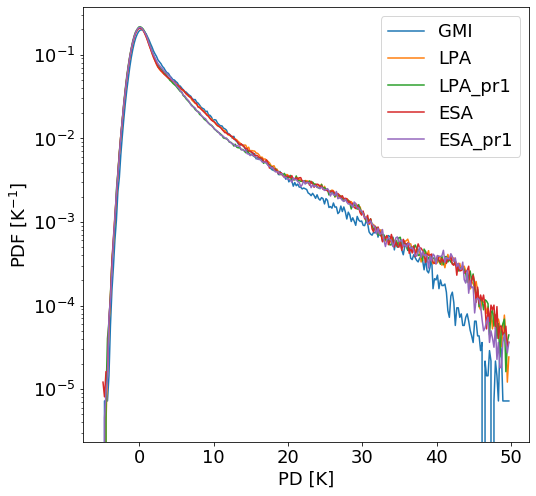

In [22]:
bin_centers = (bins[1:] + bins[:-1])/2
fig, ax = plt.subplots(1, 1, figsize = [8,8])
ax.plot(bin_centers, hist_gmi, label = "GMI")
ax.plot(bin_centers, hist_lpa, label = "LPA")
ax.plot(bin_centers, hist_lpa_pr1, label = "LPA_pr1")
ax.plot(bin_centers, hist_esa, label = "ESA")
ax.plot(bin_centers, hist_esa_pr1, label = "ESA_pr1")
ax.legend()
ax.set_yscale("log")
ax.set_xlabel("PD [K]")
ax.set_ylabel(r"PDF [K$^{-1}$]")


/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/inderpreet/anaconda3/

Text(0, 0.5, 'PDF [K$^{-1}$]')

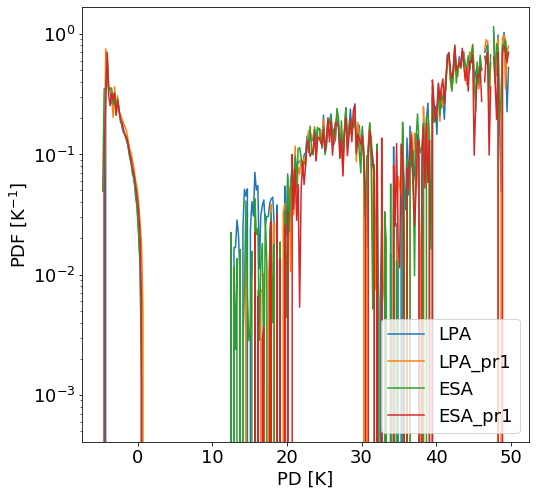

In [23]:
div_lpa = np.log10(hist_lpa/hist_gmi)
div_lpa_pr1 = np.log10(hist_lpa_pr1/hist_gmi)
div_esa = np.log10(hist_esa/hist_gmi)
div_esa_pr1 = np.log10(hist_esa_pr1/hist_gmi)


bin_centers = (bins[1:] + bins[:-1])/2
fig, ax = plt.subplots(1, 1, figsize = [8,8])
ax.plot(bin_centers, div_lpa, label = "LPA")
ax.plot(bin_centers, div_lpa_pr1, label = "LPA_pr1")
ax.plot(bin_centers, div_esa, label = "ESA")
ax.plot(bin_centers, div_esa_pr1, label = "ESA_pr1")
ax.legend()
ax.set_yscale("log")
ax.set_xlabel("PD [K]")
ax.set_ylabel(r"PDF [K$^{-1}$]")


In [24]:
from iwc2tb.GMI.GMI import GMI
import glob
import os
#inpath    =  os.path.expanduser('~/Dendrite/Projects/IWP/GMI/GMI_m65_p65/')  
inpath1   =  os.path.expanduser('~/Dendrite/Projects/IWP/GMI/GMI_m65_p65_v1.1/lpa_pr_1') 
matfiles1 = glob.glob(os.path.join(inpath1, "2009_*.mat"))

#matfiles += matfiles1

lpa_pr1       = GMI(matfiles1[:])

MatReadError: Mat file appears to be empty

In [ ]:
arofiles = []
basenames = []
aropath = os.path.expanduser('~/Dendrite/Projects/IWP/GMI/GMI_m65_p65_v1.1/') 
for file in matfiles1:
        
    basename = os.path.basename(file)
    file = os.path.join(aropath, basename)

    arofiles.append(file)
    basenames.append(basename)
    
lpa = GMI(arofiles[:])  

In [ ]:
pr    = lpa.pratio
stype = lpa.stype
iwp   = lpa.iwp

In [ ]:
ta = lpa.ta_noise


In [ ]:
ta_csky = lpa.ta_csky_noise

In [ ]:
ta_pr1 = lpa_pr1.ta_noise

In [ ]:
mask = (stype == 0)  

In [ ]:
iwpmask = (iwp > 0.0001)
iwpmask = np.logical_and(iwpmask, mask)
np.sum(iwpmask)

In [ ]:

np.sum(mask)

In [ ]:
from matplotlib import cm
import matplotlib.colors as colors

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 2, figsize = [12,6])
ax = ax.ravel()
#ax.scatter(ta_pr1[mask, 0], ta_pr1[mask, 0] - ta_pr1[mask, 1], alpha = 0.1)

#ax.scatter(ta[mask, 0], ta[mask,0] - ta[mask, 1], alpha = 0.1, s = 2, label = "ARO")
#ax.scatter(ta_pr1[mask, 0], ta_pr1[mask,0] - ta_pr1[mask, 1], alpha = 0.1, label = "TRO")

cs = ax[0].scatter(ta_pr1[iwpmask, 2], ta_pr1[iwpmask, 2] , 
           c = iwp[iwpmask], norm=colors.LogNorm(vmin=0.01, vmax= 10), s = 2,
                cmap = cm.rainbow,  label = "cloudy")

cs = ax[1].scatter(ta[iwpmask, 0] , ta[iwpmask,0] - ta[iwpmask, 1], 
           c = iwp[iwpmask], norm=colors.LogNorm(vmin=0.01, vmax= 10), s = 2,
                cmap = cm.rainbow,  label = "cloudy")

#ax.scatter(ta_csky[mask, 0], ta_csky[mask, 0] - ta_csky[mask, 1], s = 2, c = "k", alpha = 0.1, label = "clearsky")

fig.colorbar(cs, ax = ax)

#x = np.arange(100, 300, 1)
#y = x
#ax.plot(x, y, "k")
for i in range(2):
    ax[i].set_xlabel("TB 166V GHz")
    ax[i].set_ylabel("PD")
    ax[i].grid("on")
    ax[i].legend()
    #ax[i].set_xlim([100, 300])
    #ax[i].set_ylim([-5, 30])
fig.savefig("pd_water.png", bbox_inches = "tight")

In [ ]:
import xarray
import os

infile = os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_train_jul_2010.nc")
infile = os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_train_jan_lpa.nc")

In [ ]:
dataset = xarray.open_dataset(infile)

In [ ]:
dataset.ta

In [ ]:
tb = dataset.ta.data



In [ ]:
iwp = dataset.ta.iwp
lat = dataset.ta.lat
stype = dataset.ta.stype
mask = (lat > 45) & (iwp > 0.1) & (stype == 2) 
mask1 = (lat > 45) & (iwp < 0.1) & (stype == 2) 

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = [12, 6])
ax = ax.ravel()
ax[0].scatter(dataset.ta.t2m[mask], (dataset.ta[:, 0] - dataset.ta[:, 1])[mask], 
              c = iwp[mask], alpha = 0.3, norm=colors.LogNorm(vmin=0.01, vmax= 10), s = 2, 
                cmap = cm.rainbow)
#ax[0].set_xscale("log")

ax[1].scatter(dataset.ta.wvp[mask], (dataset.ta[:, 0] - dataset.ta[:, 1])[mask], 
              c = iwp[mask], alpha = 0.3, norm=colors.LogNorm(vmin=0.01, vmax= 10), s = 2, 
                cmap = cm.rainbow)

#for i in range(2):
#    ax[i].set_xlim([220, 280])
#    ax[i].set_ylim([160, 280])
#ax[1].set_xscale("log")

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
fig, ax = plt.subplots(1, 2, figsize = [12, 6])
ax = ax.ravel()
cs = ax[0].scatter(tb[:, 0][mask], tb[:, 0][mask] - tb[:, 1][mask], c = iwp[mask], 
           norm=colors.LogNorm(vmin=0.01, vmax= 10), s = 2, 
                cmap = cm.rainbow)

cs = ax[1].scatter(tb[:, 0][mask1], tb[:, 0][mask1] - tb[:, 1][mask1], c = iwp[mask1], 
           norm=colors.LogNorm(vmin=0.01, vmax= 10), s = 2, 
                cmap = cm.rainbow)

fig.colorbar(cs, ax = ax)

for i in range(2):
    ax[i].set_xlim([150, 275])
    ax[i].set_ylim([-5, 50])
    ax[i].grid('on')

In [ ]:
from iwc2tb.common.plot_locations_map import plot_locations_map

lat = lpa.lat
lon = lpa.lon

plot_locations_map(lat[iwpmask], lon[iwpmask], iwp[iwpmask])